In [1]:
# File Uploading
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/1766143996599_Merged_HR_Turnover_Production_Efficiency_Dataset (1).xlsx"

df = pd.read_excel(file_path)

df.head()


Mounted at /content/drive


,EmployeeID,Age,Gender,EducationLevel,JobRole,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Attrition,Industry,IndustryTurnoverRate,FirmRevenue,FirmEmployees,LabourProductivity
0,1,59,Female,4,Maintenance,7959,3,3,1,1,1,Retail,0.109335,1.165929e+07,4009,2908.278032
1,2,49,Male,1,HR,2126,14,1,4,1,0,Healthcare,0.321788,4.336510e+07,2983,14537.412064
2,3,35,Female,2,Production,5177,19,1,3,1,1,Retail,0.131903,3.698981e+07,3844,9622.739920
3,4,28,Female,1,Production,5056,18,3,1,0,0,Healthcare,0.194476,4.581243e+07,2700,16967.565332
4,5,41,Male,3,Maintenance,2603,2,3,2,0,0,Retail,0.101145,1.095676e+07,3845,2849.611718


In [2]:
# Dataset Exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   EmployeeID            300 non-null    int64  
 1   Age                   300 non-null    int64  
 2   Gender                300 non-null    object 
 3   EducationLevel        300 non-null    int64  
 4   JobRole               300 non-null    object 
 5   MonthlyIncome         300 non-null    int64  
 6   YearsAtCompany        300 non-null    int64  
 7   JobSatisfaction       300 non-null    int64  
 8   WorkLifeBalance       300 non-null    int64  
 9   OverTime              300 non-null    int64  
 10  Attrition             300 non-null    int64  
 11  Industry              300 non-null    object 
 12  IndustryTurnoverRate  300 non-null    float64
 13  FirmRevenue           300 non-null    float64
 14  FirmEmployees         300 non-null    int64  
 15  LabourProductivity    3

In [3]:
df.describe()

,EmployeeID,Age,EducationLevel,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Attrition,IndustryTurnoverRate,FirmRevenue,FirmEmployees,LabourProductivity
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,3.000000e+02,300.000000,300.000000
mean,150.500000,40.916667,2.363333,5624.550000,9.536667,2.553333,2.390000,0.523333,0.226667,0.247416,2.830841e+07,2735.033333,16822.399065
std,86.746758,11.634184,1.149955,1932.409351,5.581442,1.115633,1.132331,0.500290,0.419375,0.088051,1.307614e+07,1334.206025,20313.021346
min,1.000000,21.000000,1.000000,2040.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.100057,5.104290e+06,207.000000,1284.460222
25%,75.750000,31.000000,1.000000,4078.250000,4.750000,2.000000,1.000000,0.000000,0.000000,0.169508,1.701987e+07,1614.250000,6258.616118
50%,150.500000,42.000000,2.000000,5552.500000,10.000000,3.000000,2.000000,1.000000,0.000000,0.243542,2.990135e+07,2867.500000,10675.421917
75%,225.250000,52.000000,3.000000,7174.500000,14.000000,4.000000,3.000000,1.000000,0.000000,0.325660,3.865554e+07,3844.250000,18599.150166
max,300.000000,59.000000,4.000000,8981.000000,19.000000,4.000000,4.000000,1.000000,1.000000,0.399914,4.997598e+07,4996.000000,139215.982567


In [4]:
# Missing value checking
df.isnull().sum()

,0
EmployeeID,0
Age,0
Gender,0
EducationLevel,0
JobRole,0
MonthlyIncome,0
YearsAtCompany,0
JobSatisfaction,0
WorkLifeBalance,0
OverTime,0


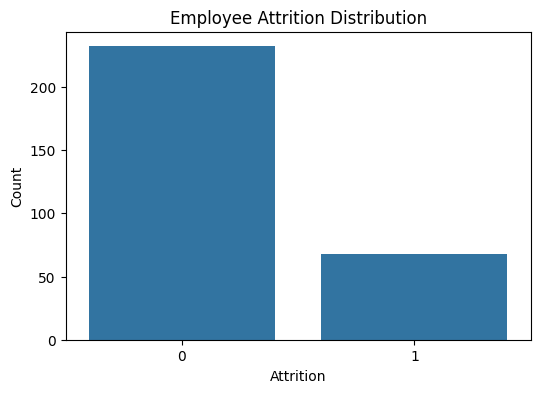

In [5]:
# Exploratory visualisation
# Attrition distribution (To check class imbalance)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Distribution")
plt.xlabel("Attrition")
plt.ylabel("Count")
plt.show()

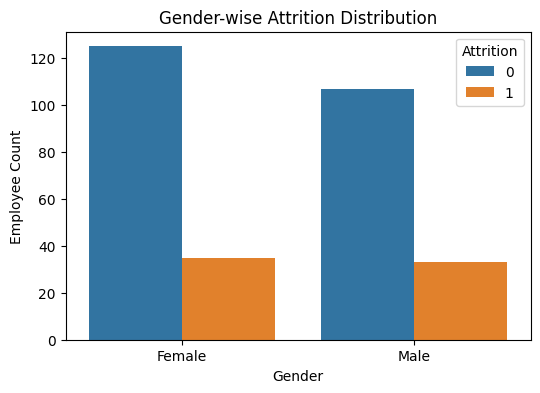

In [6]:
# Gender-wise Attrition Distribution
plt.figure(figsize=(6,4))
sns.countplot(
    x='Gender',
    hue='Attrition',
    data=df
)

plt.title("Gender-wise Attrition Distribution")
plt.xlabel("Gender")
plt.ylabel("Employee Count")
plt.legend(title="Attrition")
plt.show()

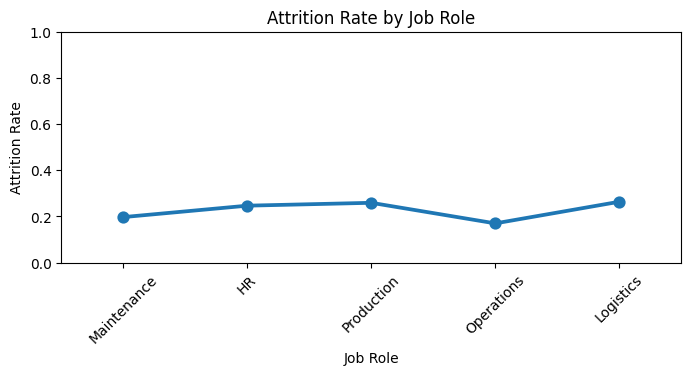

In [7]:
# Attrition Rate by Job Role
plt.figure(figsize=(8,3))
sns.pointplot(
    x='JobRole',
    y='Attrition',
    data=df,
    estimator='mean',   # attrition rate
    errorbar=None
)

plt.title("Attrition Rate by Job Role")
plt.xlabel("Job Role")
plt.ylabel("Attrition Rate")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

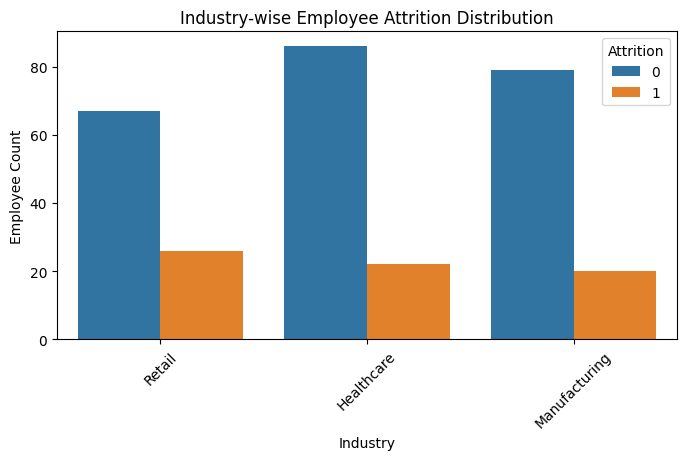

In [8]:
# Industry-wise Employee Attrition Distribution
plt.figure(figsize=(8,4))
sns.countplot(
    x='Industry',
    hue='Attrition',
    data=df
)

plt.title("Industry-wise Employee Attrition Distribution")
plt.xlabel("Industry")
plt.ylabel("Employee Count")
plt.xticks(rotation=45)
plt.legend(title="Attrition")
plt.show()

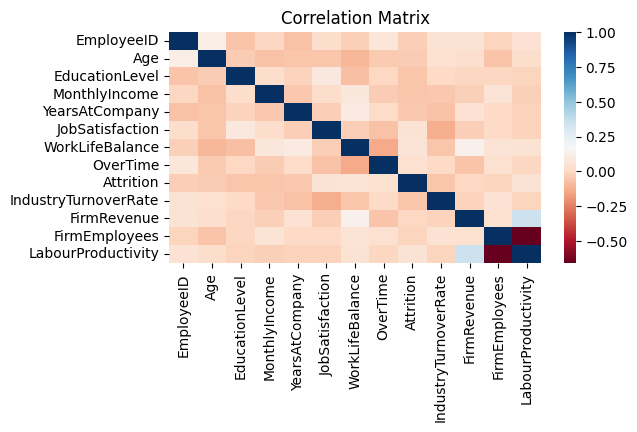

In [9]:
# Correletion heatmap
plt.figure(figsize=(6, 3))
sns.heatmap(df.corr(numeric_only=True), cmap='RdBu')
plt.title("Correlation Matrix")
plt.show()

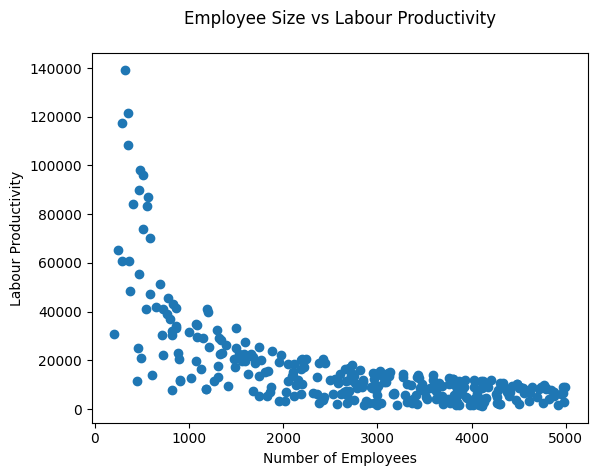

In [10]:
# Employee productivity Vs Labour productivity
plt.figure()
plt.scatter(df["FirmEmployees"], df["LabourProductivity"])

plt.xlabel("Number of Employees")
plt.ylabel("Labour Productivity")
plt.title(
    "Employee Size vs Labour Productivity\n"
)

plt.show()

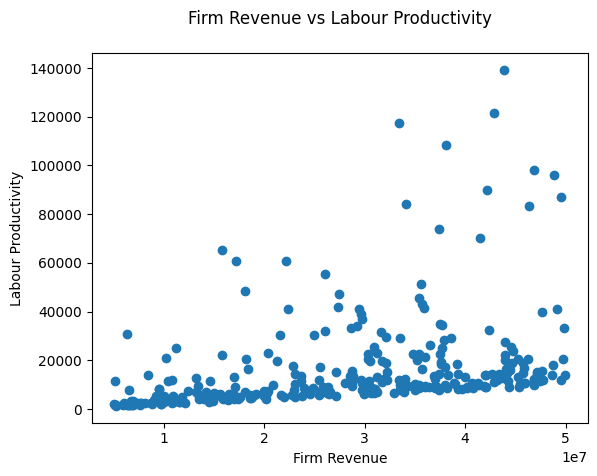

In [11]:
# FirmRevenue vs LabourProductivity
plt.figure()
plt.scatter(df["FirmRevenue"], df["LabourProductivity"])

plt.xlabel("Firm Revenue")
plt.ylabel("Labour Productivity")
plt.title(
    "Firm Revenue vs Labour Productivity\n"
)

plt.show()


In [12]:
# Data Preprocessing
# Label encoding
from sklearn.preprocessing import LabelEncoder
categorical_cols_to_encode = [
    'Gender',
    'JobRole',
    'Industry',
]
df_labeled_encoded = df.copy()
label_encoder = LabelEncoder()

for col in categorical_cols_to_encode:
    df_labeled_encoded[col] = label_encoder.fit_transform(df_labeled_encoded[col])

display(df_labeled_encoded.head())

,EmployeeID,Age,Gender,EducationLevel,JobRole,MonthlyIncome,YearsAtCompany,JobSatisfaction,WorkLifeBalance,OverTime,Attrition,Industry,IndustryTurnoverRate,FirmRevenue,FirmEmployees,LabourProductivity
0,1,59,0,4,2,7959,3,3,1,1,1,2,0.109335,1.165929e+07,4009,2908.278032
1,2,49,1,1,0,2126,14,1,4,1,0,0,0.321788,4.336510e+07,2983,14537.412064
2,3,35,0,2,4,5177,19,1,3,1,1,2,0.131903,3.698981e+07,3844,9622.739920
3,4,28,0,1,4,5056,18,3,1,0,0,0,0.194476,4.581243e+07,2700,16967.565332
4,5,41,1,3,2,2603,2,3,2,0,0,2,0.101145,1.095676e+07,3845,2849.611718


In [13]:
# Input-output feature selection
X = df_labeled_encoded.drop(['Attrition'], axis=1)
y = df_labeled_encoded['Attrition']

In [14]:
# Dataset Splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [15]:
# Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
# Class Imbalance Handling
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train_scaled, y_train
)

pd.Series(y_train_smote).value_counts()

,count
Attrition,
0,186
1,186


In [20]:
# Logistic Regression Model Development
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [58]:
# Performance of Logistic Regression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_preds = lr_model.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))
print(classification_report(y_test, lr_preds))

Logistic Regression Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.86      0.54      0.67        46
           1       0.32      0.71      0.44        14

    accuracy                           0.58        60
   macro avg       0.59      0.63      0.56        60
weighted avg       0.74      0.58      0.61        60



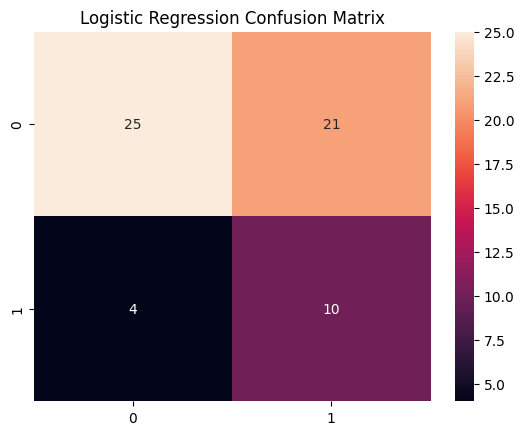

In [24]:
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

In [25]:
# Random Forest Model development
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train_smote, y_train_smote)

RandomForestClassifier(n_estimators=200, random_state=42)

In [26]:
# Performance of Random Forest
rf_preds = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

Random Forest Accuracy: 0.7
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        46
           1       0.17      0.07      0.10        14

    accuracy                           0.70        60
   macro avg       0.46      0.48      0.46        60
weighted avg       0.62      0.70      0.65        60



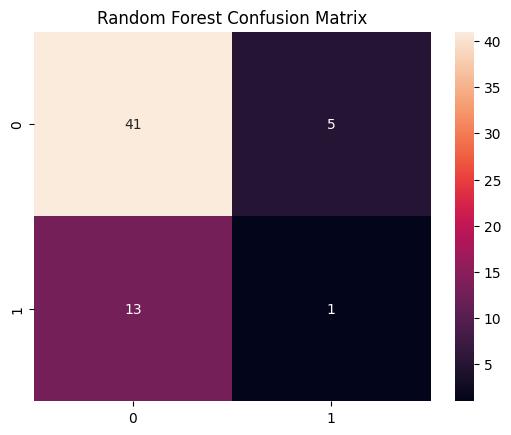

In [27]:
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [28]:
# XGBoost model development
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

xgb_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [30]:
# Performance of XGBoost
xgb_preds = xgb_model.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

XGBoost Accuracy: 0.5833333333333334
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        46
           1       0.08      0.07      0.07        14

    accuracy                           0.58        60
   macro avg       0.40      0.41      0.40        60
weighted avg       0.57      0.58      0.58        60



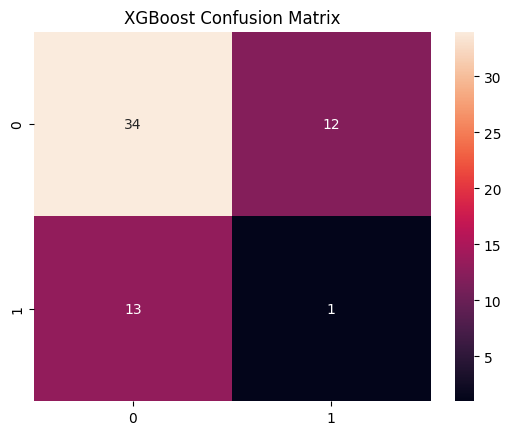

In [31]:
sns.heatmap(confusion_matrix(y_test, xgb_preds), annot=True, fmt='d')
plt.title("XGBoost Confusion Matrix")
plt.show()

In [34]:
# Performance comparison
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, lr_preds),
        accuracy_score(y_test, rf_preds),
        accuracy_score(y_test, xgb_preds)
    ]
})

results

,Model,Accuracy
0,Logistic Regression,0.583333
1,Random Forest,0.700000
2,XGBoost,0.583333


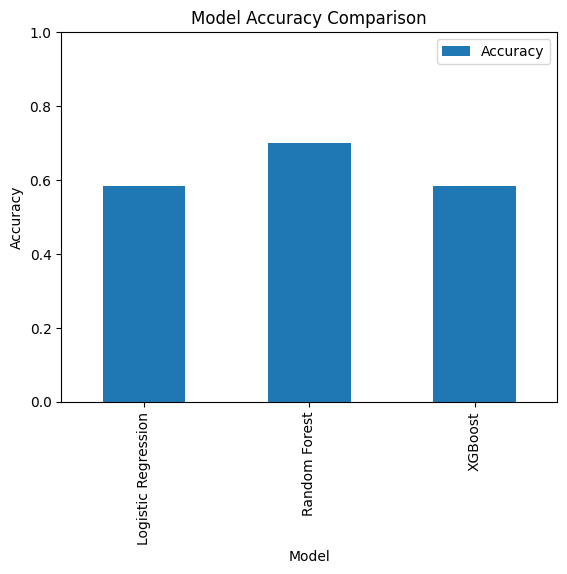

In [35]:
results.set_index("Model").plot(kind='bar')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()

In [37]:
# Compare ROC-AUC of the models
# Logistic Regression probabilities
lr_probs = lr_model.predict_proba(X_test_scaled)[:, 1]

# Random Forest probabilities
rf_probs = rf_model.predict_proba(X_test_scaled)[:, 1]

# XGBoost probabilities
xgb_probs = xgb_model.predict_proba(X_test_scaled)[:, 1]

In [39]:
from sklearn.metrics import roc_auc_score

lr_roc_auc = roc_auc_score(y_test, lr_probs)
rf_roc_auc = roc_auc_score(y_test, rf_probs)
xgb_roc_auc = roc_auc_score(y_test, xgb_probs)

print("Logistic Regression ROC-AUC:", lr_roc_auc)
print("Random Forest ROC-AUC:", rf_roc_auc)
print("XGBoost ROC-AUC:", xgb_roc_auc)

Logistic Regression ROC-AUC: 0.5745341614906833
Random Forest ROC-AUC: 0.43322981366459623
XGBoost ROC-AUC: 0.4937888198757764


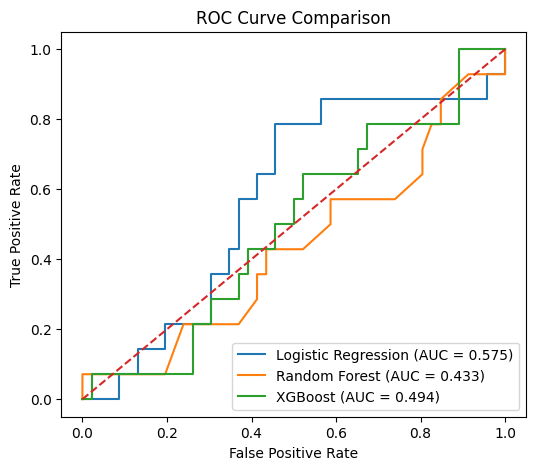

In [40]:
# ROC curve data
from sklearn.metrics import roc_curve

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

plt.figure(figsize=(6,5))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_roc_auc:.3f})")
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_roc_auc:.3f})")
plt.plot(xgb_fpr, xgb_tpr, label=f"XGBoost (AUC = {xgb_roc_auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [41]:
# K-fold cross validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [42]:
# Logistic Regression model
lr_model = LogisticRegression(
    max_iter=1000,
    solver='liblinear',
    random_state=42
)

# Stratified K-Fold
skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

# Cross-validated ROC-AUC
lr_cv_auc = cross_val_score(
    lr_model,
    X_train_smote,
    y_train_smote,
    cv=skf,
    scoring='roc_auc'
)

print("Logistic Regression CV ROC-AUC scores:", lr_cv_auc)
print("Logistic Regression Mean ROC-AUC:", lr_cv_auc.mean())

Logistic Regression CV ROC-AUC scores: [0.60668563 0.55547653 0.5485756  0.50913075 0.45799854]
Logistic Regression Mean ROC-AUC: 0.5355734112490869


In [43]:
# Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

skf = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

rf_cv_auc = cross_val_score(
    rf_model,
    X_train_smote,
    y_train_smote,
    cv=skf,
    scoring='roc_auc'
)

print("Random Forest CV ROC-AUC scores:", rf_cv_auc)
print("Random Forest Mean ROC-AUC:", rf_cv_auc.mean())

Random Forest CV ROC-AUC scores: [0.96088193 0.93492176 0.8907962  0.92585829 0.86815194]
Random Forest Mean ROC-AUC: 0.9161220252969897


In [44]:
# XGBoost
xgb_model = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    eval_metric='logloss'
)

xgb_cv_auc = cross_val_score(
    xgb_model,
    X_train_smote,
    y_train_smote,
    cv=skf,
    scoring='roc_auc'
)

print("XGBoost CV ROC-AUC scores:", xgb_cv_auc)
print("XGBoost Mean ROC-AUC:", xgb_cv_auc.mean())

XGBoost CV ROC-AUC scores: [0.92460882 0.91251778 0.88093499 0.91526662 0.88312637]
XGBoost Mean ROC-AUC: 0.9032909153819537


In [45]:
cv_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Mean ROC-AUC (5-Fold CV)": [
        lr_cv_auc.mean(),
        rf_cv_auc.mean(),
        xgb_cv_auc.mean()
    ],
    "Std Dev": [
        lr_cv_auc.std(),
        rf_cv_auc.std(),
        xgb_cv_auc.std()
    ]
})

cv_results

,Model,Mean ROC-AUC (5-Fold CV),Std Dev
0,Logistic Regression,0.535573,0.049677
1,Random Forest,0.916122,0.032846
2,XGBoost,0.903291,0.017829


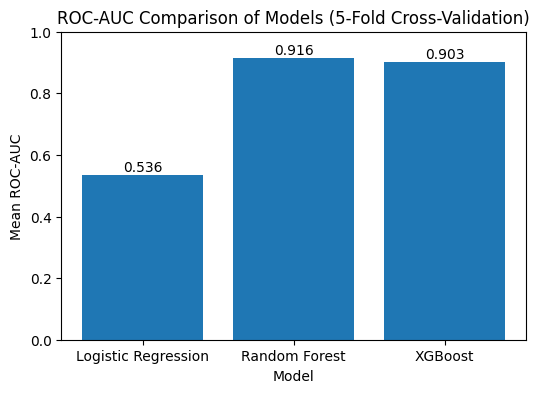

In [46]:
# ROC-AUC comparision after 5-fold cross validation
plt.figure(figsize=(6,4))
plt.bar(
    cv_results["Model"],
    cv_results["Mean ROC-AUC (5-Fold CV)"]
)

plt.title("ROC-AUC Comparison of Models (5-Fold Cross-Validation)")
plt.xlabel("Model")
plt.ylabel("Mean ROC-AUC")
plt.ylim(0, 1)

# Add value labels on bars
for i, value in enumerate(cv_results["Mean ROC-AUC (5-Fold CV)"]):
    plt.text(i, value + 0.01, f"{value:.3f}", ha='center')

plt.show()

In [54]:
# Classification reports after k-fold validation
from sklearn.model_selection import cross_val_predict

y_cv_pred = cross_val_predict(
    lr_model,
    X_train_smote,
    y_train_smote,
    cv=skf
)

print("Logistic regression after cross vaidation\n")
print(classification_report(y_train_smote, y_cv_pred))

Logistic regression after cross vaidation

              precision    recall  f1-score   support

           0       0.56      0.54      0.55       186
           1       0.56      0.58      0.57       186

    accuracy                           0.56       372
   macro avg       0.56      0.56      0.56       372
weighted avg       0.56      0.56      0.56       372



In [50]:
y_cv_pred = cross_val_predict(
    rf_model,
    X_train_smote,
    y_train_smote,
    cv=skf
)

print("Random Forest after cross vaidation\n")
print(classification_report(y_train_smote, y_cv_pred))

Random Forest after cross vaidation

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       186
           1       0.90      0.84      0.87       186

    accuracy                           0.87       372
   macro avg       0.87      0.87      0.87       372
weighted avg       0.87      0.87      0.87       372



In [56]:
y_cv_pred = cross_val_predict(
    xgb_model,
    X_train_smote,
    y_train_smote,
    cv=skf
)

print("XGBoost after cross vaidation\n")
print(classification_report(y_train_smote, y_cv_pred))

XGBoost after cross vaidation

              precision    recall  f1-score   support

           0       0.81      0.82      0.82       186
           1       0.82      0.81      0.81       186

    accuracy                           0.81       372
   macro avg       0.81      0.81      0.81       372
weighted avg       0.81      0.81      0.81       372

